In [47]:
import pandas as pd
import matplotlib.pyplot as plt
from Bio import SeqIO

In [38]:
### Retrieve True Argonaute IDs from original fasta files
# Extracting organism and seq info just in case

def extract_tag(s, tag):
    parts = s.split()
    tag_value = ''
    is_recording = False
    tag_prefix = tag + '='
    for part in parts:
        if part.startswith(tag_prefix):
            is_recording = True
            tag_value += part[len(tag_prefix):]
        elif is_recording and '=' in part and not part.startswith(tag_prefix):
            break
        elif is_recording:
            tag_value += ' ' + part
    return tag_value


def extract_targetid(s):
    return s.split('|')[1]


def read_fasta(infasta):
    fasta_dict = {}
    for record in SeqIO.parse(infasta, "fasta"):
        OS = extract_tag(record.description, 'OS')
        OX = extract_tag(record.description, 'OX')
        fasta_dict[extract_targetid(record.id)] = {'seq': str(record.seq), 'OS': OS, 'OX': OX}
    return fasta_dict


ago_fasta = '/home/moon/projects/AgoAnalysis/fasta/AGO_all.fasta'
wago_fasta = '/home/moon/projects/AgoAnalysis/fasta/WAGO_all.fasta'
piwi_fasta = '/home/moon/projects/AgoAnalysis/fasta/PIWI_all.fasta'

ago_fasta_dict = read_fasta(ago_fasta)
wago_fasta_dict = read_fasta(wago_fasta)
piwi_fasta_dict = read_fasta(piwi_fasta)

true_ago_ids = list(ago_fasta_dict.keys())
true_piwi_ids = list(piwi_fasta_dict.keys())
true_wago_ids = list(wago_fasta_dict.keys())

In [39]:
### Load MMseqs summary data

all_summary = '/home/moon/projects/AgoAnalysis/mmseqs/all_mmseqs_summary.tsv'
ago_summary = '/home/moon/projects/AgoAnalysis/mmseqs/Ago_mmseqs_summary.tsv'
wago_summary = '/home/moon/projects/AgoAnalysis/mmseqs/Wago_mmseqs_summary.tsv'
piwi_summary = '/home/moon/projects/AgoAnalysis/mmseqs/Piwi_mmseqs_summary.tsv'

# all_df = pd.read_csv(all_summary, sep='\t')
ago_df = pd.read_csv(ago_summary, sep='\t')
wago_df = pd.read_csv(wago_summary, sep='\t')
piwi_df = pd.read_csv(piwi_summary, sep='\t')
ago_df['Clade'] = 'AGO_like'
wago_df['Clade'] = 'WAGO_like'
piwi_df['Clade'] = 'PIWI_like'

clade_dfid_dict = {'AGO': {'df': ago_df, 'ids': true_ago_ids},
                   'WAGO': {'df': wago_df, 'ids': true_wago_ids},
                   'PIWI': {'df': piwi_df, 'ids': true_piwi_ids}}

for clade in clade_dfid_dict.keys():
    df_tmp = clade_dfid_dict[clade]['df']
    ids = clade_dfid_dict[clade]['ids']
    df_tmp.loc[df_tmp['target'].isin(ids), 'Clade'] = clade

concat_df = pd.concat([ago_df, wago_df, piwi_df], ignore_index=True)
concat_df

,query,target,fident,alnlen,mismatch,gapopen,qstart,qend,qlen,tstart,tend,tlen,evalue,bits,taxid,taxname,Clade
0,Q9XVI3,Q9XVI3,0.967,905,30,0,1,905,905,1,905,905,0.000000e+00,1844,6239,Caenorhabditis elegans,AGO
1,Q9XVI3,G0MFJ5,0.726,904,247,0,1,904,905,1,901,902,0.000000e+00,1323,135651,Caenorhabditis brenneri,AGO_like
2,Q9XVI3,A0A2G5VFI2,0.709,905,262,0,1,905,905,1,902,902,0.000000e+00,1287,1611254,Caenorhabditis nigoni,AGO_like
3,Q9XVI3,A0A8R1DSF6,0.703,905,268,0,1,905,905,1,903,903,0.000000e+00,1274,281687,Caenorhabditis japonica,AGO_like
4,Q9XVI3,A8WWP9,0.716,788,223,0,62,849,905,122,908,919,0.000000e+00,1135,6238,Caenorhabditis briggsae,AGO_like
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20240,Q7Z3Z4,A0A8D2KC34,0.896,187,19,0,666,852,852,7,193,193,3.230000e-97,351,9999,Urocitellus parryii,PIWI_like
20241,Q7Z3Z4,A0A8C0KVH5,0.919,181,15,0,672,852,852,28,208,208,1.085000e-96,350,286419,Canis lupus dingo,PIWI_like
20242,Q7Z3Z4,A0A8C0NQ80,0.913,181,16,0,672,852,852,18,198,198,6.678000e-96,347,9615,Canis lupus familiaris,PIWI_like
20243,Q7Z3Z4,A0A4X1TX87,0.862,188,26,0,665,852,852,15,202,202,9.479000e-93,338,9823,Sus scrofa,PIWI_like


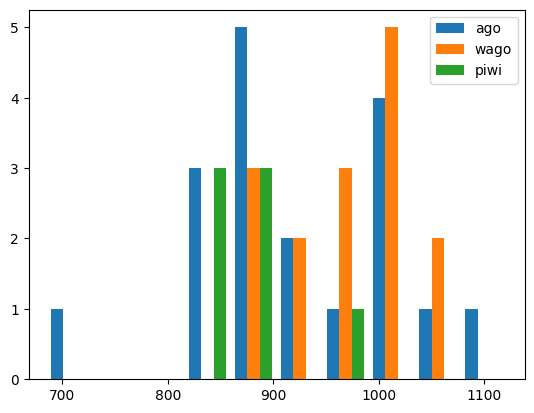

In [48]:
ago_seqs = [len(v['seq']) for v in ago_fasta_dict.values()]
wago_seqs = [len(v['seq']) for v in wago_fasta_dict.values()]
piwi_seqs = [len(v['seq']) for v in piwi_fasta_dict.values()]

plt.hist([ago_seqs, wago_seqs, piwi_seqs], label=['ago', 'wago', 'piwi'], bins=10)
plt.legend()
plt.show()

<Axes: >

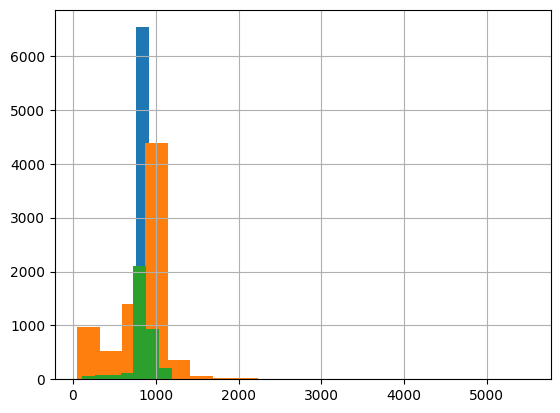

In [49]:
ago_df['tlen'].hist(bins=20)
wago_df['tlen'].hist(bins=20)
piwi_df['tlen'].hist(bins=20)

In [40]:
### Sample Sequences

num_seqs = 2000

ago_seq_ids = [i for i in true_ago_ids]
piwi_seq_ids = [i for i in true_piwi_ids]
wago_seq_ids = [i for i in true_wago_ids]

low = 750
high = 1200

ago_df_filtered = ago_df[(low<ago_df['tlen']) & (ago_df['tlen']<high)]
wago_df_filtered = wago_df[(low<wago_df['tlen']) & (wago_df['tlen']<high)]
piwi_df_filtered = piwi_df[(low<piwi_df['tlen']) & (piwi_df['tlen']<high)]

ago_seq_ids += ago_df_filtered['target'].drop_duplicates().sample(n=num_seqs - len(ago_seq_ids), replace=False).tolist()
wago_seq_ids += wago_df_filtered['target'].drop_duplicates().sample(n=num_seqs - len(wago_seq_ids), replace=False).tolist()
piwi_seq_ids += piwi_df_filtered['target'].drop_duplicates().sample(n=num_seqs - len(piwi_seq_ids), replace=False).tolist()

target_ids = set(ago_seq_ids + wago_seq_ids + piwi_seq_ids)  # the order will change here
print(f'Unique target ids: {len(target_ids)}')

Unique target ids: 5801


In [41]:
### Output (1) sampled target_ids and (2) target_id - clade 

sampled_id_path = '/home/moon/projects/AgoAnalysis/mmseqs/sampled_target_ids_0307.txt'
with open(sampled_id_path, 'w') as f:
    f.write('\n'.join(target_ids))

id2clade_path = '/home/moon/projects/AgoAnalysis/mmseqs/id2clade.tsv'
concat_df[['target', 'Clade']].to_csv(id2clade_path, sep='\t', index=False, header=False)

In [42]:
def read_id2clade(path):
    id2clade = {}
    true_ids = ['AGO', 'PIWI', 'WAGO']
    with open(path, 'r') as f:
        lines = f.readlines()
        for line in lines:
            target, clade = line.rstrip().split('\t')
            if target not in id2clade.keys():
                id2clade[target] = clade if clade in true_ids else 'Other'
            else:
                if id2clade[target] in true_ids:
                    continue
                elif clade in true_ids:
                    id2clade[target] = clade
                else:
                    id2clade[target] = 'Other'
    return id2clade    

In [43]:
### Check count per target_id

# from collections import Counter

# id2clade = read_id2clade(id2clade_path)
# freq = Counter(id2clade.values())

In [44]:
# concat_df_merged = concat_df.groupby('target')['Clade'].apply(lambda x: '-'.join(sorted(x.unique()))).reset_index()
# id2clade = concat_df_merged.set_index('target')['Clade'].to_dict()

In [45]:
### Run MSA via clustalo for the sampled fasta

# sampled_fasta = '/home/moon/projects/AgoAnalysis/fasta/Argonaute_mmseqs_sampled.fasta'
# db_fasta = '/home/moon/src/mmseqs/databases/UniProtKB.fasta'
# sampled_msa = '/home/moon/projects/AgoAnalysis/msa/Argnoaute_mmseqs_sampled.msa.fasta '

# !seqkit grep -f  {sampled_id_path} {db_fasta} --id-regexp "\|([^\|]+)\|" -o {sampled_fasta}
# !clustalo -i {sampled_fasta} -o {sampled_msa} --outfmt=fasta -v 